In [2]:
df = pd.read_csv("laptop_data_cleaned.csv") 

In [3]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("Dataset Info:")
print(df.info())
print("Statistical Summary:")
print(df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int64  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   TouchScreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   Ppi          1272 non-null   float64
 8   Cpu_brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu_brand    1272 non-null   object 
 12  Os           1272 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.1+ KB
None
Statistical Summary:
       Company  TypeName          Ram       Weight        Price  TouchScreen  \
count     1272      1272  1272.000000  1272.000000  1272.000000  1272.000000   
uniq

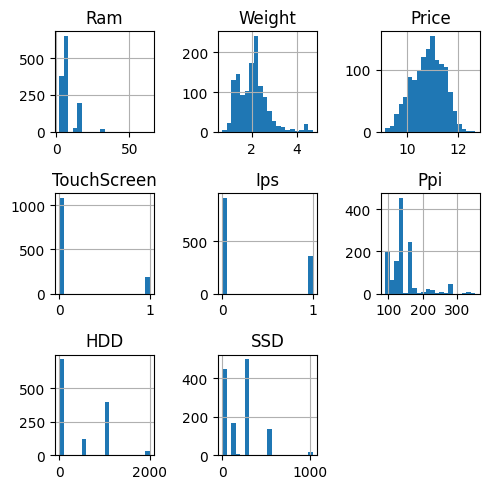

In [13]:
df.hist(bins=20, figsize=(5, 5))
plt.tight_layout()
plt.show()

In [5]:
target_col = "Price"
X = df.drop(columns=[target_col])
y = df[target_col]
label_encoders = {}
for col in X.select_dtypes(include="object"):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R² Score: {r2:.4f}")

MSE: 0.0482
 RMSE: 0.2196
 R² Score: 0.8694


In [9]:
joblib.dump(model, "laptop_price_model.pkl")

['laptop_price_model.pkl']